In [1]:
# Project # 1 Jupyter Notebook
# Created by Melinda Eudy, Cameron Farquhar, Markita Francis, Luis Rojas, Kelly Rose.
# Project: 2017 Crime Data Used from several resources, UCR Crime Rates by County, US Census, and BJ Crime
# !pip install seaborn

In [2]:
# Dependencies and Setup *******Review before final presentation and remove what is not needed ************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date
from functools import reduce
import json
import ctypes
import seaborn as sns
import datetime

In [3]:
# Part 1 - open UCR Crime Rates by County.csv file
#----------open 37059-Codebook County Codes.csv file and merge into first file to obtain County Names
UCR_Crime = "Resources/UCR_Crime_Rate_by_County.csv"

# Read file and store in Pandas data frame\n",
UCR_Crime_df = pd.read_csv(UCR_Crime)
UCR_Crime_df
#UCR_Crime_df.count() ----all columns had same count

,FIPS_ST,FIPS_CTY,population,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,...,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,29,510,318416,1791.995377,1,1,4,1612,318667,318667,...,5706,22329,119,200,1778,3609,4995,13791,3543,464
1,5,35,49746,1754.914968,2,1,4,130,50717,50717,...,873,3424,8,38,165,662,1482,1753,189,28
2,17,3,7629,1664.700485,3,1,4,604,8040,8040,...,127,278,1,2,5,119,82,184,12,2
3,48,261,412,1456.310680,4,1,4,2681,444,444,...,6,13,0,3,1,2,5,4,4,0
4,22,31,27083,1447.402430,5,1,4,1137,26971,26971,...,392,703,3,4,17,368,149,494,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,18,115,5994,0.000000,3132,1,4,762,6084,0,...,0,5,0,0,0,0,2,2,0,0
3132,28,101,21689,0.000000,3133,1,4,1465,21545,3346,...,0,5,0,0,0,0,4,0,1,0
3133,46,73,2066,0.000000,3134,1,4,2424,2108,2108,...,0,5,0,0,0,0,1,3,1,0
3134,40,25,2335,0.000000,3135,1,4,2167,2502,2502,...,0,3,0,0,0,0,1,2,0,0


In [4]:
# FIPS-ST is the first number of the Code, FIPS_City is the last three numbers of the code.
#-----Make FIPS_City three digits wide (adding zeros in front) and combine the two columns
UCR_Crime_df["FIPS_ST"] = UCR_Crime_df["FIPS_ST"].apply(str)
UCR_Crime_df["FIPS_CTY"] = UCR_Crime_df["FIPS_CTY"].apply(str)
UCR_Crime_df["FIPS_CTY"] = UCR_Crime_df["FIPS_CTY"].apply(lambda x: x.zfill(3))
UCR_Crime_df["CODE"] = UCR_Crime_df[["FIPS_ST", "FIPS_CTY"]].agg("".join, axis=1)
UCR_Crime_df

,FIPS_ST,FIPS_CTY,population,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,...,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,CODE
0,29,510,318416,1791.995377,1,1,4,1612,318667,318667,...,22329,119,200,1778,3609,4995,13791,3543,464,29510
1,5,035,49746,1754.914968,2,1,4,130,50717,50717,...,3424,8,38,165,662,1482,1753,189,28,5035
2,17,003,7629,1664.700485,3,1,4,604,8040,8040,...,278,1,2,5,119,82,184,12,2,17003
3,48,261,412,1456.310680,4,1,4,2681,444,444,...,13,0,3,1,2,5,4,4,0,48261
4,22,031,27083,1447.402430,5,1,4,1137,26971,26971,...,703,3,4,17,368,149,494,60,0,22031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,18,115,5994,0.000000,3132,1,4,762,6084,0,...,5,0,0,0,0,2,2,0,0,18115
3132,28,101,21689,0.000000,3133,1,4,1465,21545,3346,...,5,0,0,0,0,4,0,1,0,28101
3133,46,073,2066,0.000000,3134,1,4,2424,2108,2108,...,5,0,0,0,0,1,3,1,0,46073
3134,40,025,2335,0.000000,3135,1,4,2167,2502,2502,...,3,0,0,0,0,1,2,0,0,40025


In [5]:
# Finalize file for merging
#-----remove columns: STUDYNO, EDITION, PART, FLIPS_ST, FLIPS_CTY
#-----move Code to the front of the file - ensure that it is a int64.
UCR_Crime_df.drop(columns = ["index", "EDITION", "PART", "FIPS_ST", "FIPS_CTY", "MODINDX", "INDEX", "COVIND"], inplace = True)
UCR_Crime_df["CODE"] = UCR_Crime_df["CODE"].apply("int64")
pd.set_option("precision",0)
collist = UCR_Crime_df.columns.tolist()
collist.insert(0, collist.pop(collist.index("CODE")))
UCR_Crime_df = UCR_Crime_df.reindex(columns = collist)

# Rename columns for better understanding\
UCR_Crime_df.rename(columns={"AG_ARRST": "# COUNTY AGENCY REPORTING ARREST", "AG_OFF": "# COUNTY AGENCY REPORTING CRIME"}, inplace = True)
UCR_Crime_df.rename(columns={"CPOPCRIM": "COUNTY POP - AGENCY REPORTING CRIME", "CPOPARST": "COUNTY POP - AGENCY REPORTING ARRESTS", "population": "POPULATION", "crime_rate_per_100000": "CRIME RATE PER 100k"}, inplace = True)
UCR_Crime_df

,CODE,POPULATION,CRIME RATE PER 100k,IDNO,COUNTY POP - AGENCY REPORTING ARRESTS,COUNTY POP - AGENCY REPORTING CRIME,# COUNTY AGENCY REPORTING ARREST,# COUNTY AGENCY REPORTING CRIME,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,29510,318416,1792,1612,318667,318667,15,15,119,200,1778,3609,4995,13791,3543,464
1,5035,49746,1755,130,50717,50717,4,4,8,38,165,662,1482,1753,189,28
2,17003,7629,1665,604,8040,8040,2,2,1,2,5,119,82,184,12,2
3,48261,412,1456,2681,444,444,1,1,0,3,1,2,5,4,4,0
4,22031,27083,1447,1137,26971,26971,3,3,3,4,17,368,149,494,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,18115,5994,0,762,6084,0,2,1,0,0,0,0,2,2,0,0
3132,28101,21689,0,1465,21545,3346,3,1,0,0,0,0,4,0,1,0
3133,46073,2066,0,2424,2108,2108,1,1,0,0,0,0,1,3,1,0
3134,40025,2335,0,2167,2502,2502,2,2,0,0,0,0,1,2,0,0


In [6]:
# Part 2: Open up code book for State and County
# -----merge this data into the Crime data frame
UCR_Codes = "Resources/Codebook_County_Codes.csv"

# Read file and store in Pandas data frame
UCR_Codes_df = pd.read_csv(UCR_Codes)
#UCR_Codes_df.count()   --- all columns had the same count

# Before mergining data:
# ------Remove Unnamed:3 - Unnamed:5
# ------Remove decimal in Code
#-------Rename Code to CODE\n",
UCR_Codes_df.drop(columns = ["Unnamed: 3", "Unnamed: 4", "Unnamed: 5"], inplace = True)
UCR_Codes_df.rename(columns={"Code":"CODE", "State":"STATE", "County":"COUNTY"}, inplace = True)
UCR_Codes_df["CODE"] = UCR_Codes_df["CODE"].apply("int64")
pd.set_option("precision",0)
UCR_Codes_df

,STATE,CODE,COUNTY
0,Alabama,1001,Autauga
1,Alabama,1003,Baldwin
2,Alabama,1005,Barbour
3,Alabama,1007,Bibb
4,Alabama,1009,Blount
...,...,...,...
3172,NaN,-9223372036854775808,NaN
3173,NaN,-9223372036854775808,NaN
3174,NaN,-9223372036854775808,NaN
3175,NaN,-9223372036854775808,NaN


In [7]:
# Merge Codebook_County_Codes.csv into UCR_Crime_Rates_by_County.csv
merged_UCR_Crime_df = pd.merge(UCR_Codes_df, UCR_Crime_df,on="CODE")
merged_UCR_Crime_df
#merged_UCR_Crime_df.dtypes

,STATE,CODE,COUNTY,POPULATION,CRIME RATE PER 100k,IDNO,COUNTY POP - AGENCY REPORTING ARRESTS,COUNTY POP - AGENCY REPORTING CRIME,# COUNTY AGENCY REPORTING ARREST,# COUNTY AGENCY REPORTING CRIME,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,Alabama,1001,Autauga,55246,252,1,57161,54604,3,3,3,15,34,87,447,1233,85,108
1,Alabama,1003,Baldwin,195540,228,2,187467,187467,14,14,8,30,76,332,967,3829,192,31
2,Alabama,1005,Barbour,27076,177,3,27228,25566,6,4,0,4,8,36,90,362,21,0
3,Alabama,1007,Bibb,22512,218,4,22907,22857,5,6,1,4,8,36,122,251,27,0
4,Alabama,1009,Blount,57872,211,5,57909,57909,6,6,1,11,9,101,397,865,86,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,Wyoming,56037,Sweetwater,45237,433,3173,44817,44817,3,3,3,18,5,170,120,794,38,7
3129,Wyoming,56039,Teton,22268,180,3174,21861,9851,2,1,0,4,1,35,28,203,6,0
3130,Wyoming,56041,Uinta,21066,33,3175,21290,19157,3,2,0,3,0,4,37,333,12,0
3131,Wyoming,56043,Washakie,8463,59,3176,8610,8610,2,2,0,0,0,5,2,44,1,0


In [8]:
# Part 3: Bring in data from the US census per county
# -------adding median income per county
response = requests.get("https://api.census.gov/data/2017/acs/acs1?get=NAME,B06011_001E&for=county:*").json()
                        
# locate the first row and make it the column name and then drop row
income_df = pd.DataFrame(response)
income_df.columns = income_df.iloc[0]
income_df = income_df.drop([1])
    
# delete and null info and reset the index
income_df = income_df.dropna(how='any')
income_df.reset_index()
    
#replace the integer column names with values in row 0
income_df.columns = income_df.iloc[0]
income_df = income_df.drop([0])
income_df.reset_index()
income_df
#income_df.dtypes"

,NAME,B06011_001E,state,county
2,"Calhoun County, Alabama",26121,01,015
3,"Cullman County, Alabama",22692,01,043
4,"DeKalb County, Alabama",21581,01,049
5,"Elmore County, Alabama",28967,01,051
6,"Etowah County, Alabama",19861,01,055
...,...,...,...,...
822,"Waukesha County, Wisconsin",40267,55,133
823,"Winnebago County, Wisconsin",29975,55,139
824,"Wood County, Wisconsin",30486,55,141
825,"Laramie County, Wyoming",31837,56,021


In [9]:
# create new columns for County and State
# ----Remove Columns: NAME, state, county
#-----Change column names to match merged UCR Crime data
#-----Remove word "County" in County name
income_df['County Name'] = income_df['NAME'].str.split(', ').apply(lambda x: x[0])
income_df['State Name'] = income_df['NAME'].str.split(', ').apply(lambda x: x[-1])
income_df['County Name'] = income_df['NAME'].str.split(' ').apply(lambda x: x[0])
income_df.drop(columns = ["NAME", "state", "county"], inplace = True)
income_df.rename(columns={"County Name":"COUNTY", "State Name":"STATE", "B06011_001E":"MEDIAN INCOME"}, inplace = True)
                          
# Clean up formating in Median Income
income_df["MEDIAN INCOME"] = income_df["MEDIAN INCOME"].apply("int64")
income_df
#income_df.dtypes

,MEDIAN INCOME,COUNTY,STATE
2,26121,Calhoun,Alabama
3,22692,Cullman,Alabama
4,21581,DeKalb,Alabama
5,28967,Elmore,Alabama
6,19861,Etowah,Alabama
...,...,...,...
822,40267,Waukesha,Wisconsin
823,29975,Winnebago,Wisconsin
824,30486,Wood,Wisconsin
825,31837,Laramie,Wyoming


In [10]:
# Merge Census Median Income into UCR_Crime_Rates_by_County.csv\n",
# Move Median Income to front of chart\n",
Crime_df = pd.merge(merged_UCR_Crime_df, income_df, on=["STATE", "COUNTY"], how="left" )
collist = Crime_df.columns.tolist()
collist.insert(4, collist.pop(collist.index("MEDIAN INCOME")))
Crime_df = Crime_df.reindex(columns = collist)
    
# delete and null info and reset theindex
Crime_df = Crime_df.dropna(how='any')
Crime_df

,STATE,CODE,COUNTY,POPULATION,MEDIAN INCOME,CRIME RATE PER 100k,IDNO,COUNTY POP - AGENCY REPORTING ARRESTS,COUNTY POP - AGENCY REPORTING CRIME,# COUNTY AGENCY REPORTING ARREST,# COUNTY AGENCY REPORTING CRIME,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
7,Alabama,1015,Calhoun,116736,26121,581,8,122213,118270,8,10,6,37,131,504,1710,3482,147,34
21,Alabama,1043,Cullman,80811,22692,238,22,80832,80859,3,4,2,16,13,161,483,1483,99,6
25,Alabama,1051,Elmore,80902,28967,284,26,80528,80484,7,8,4,23,44,159,665,1367,85,14
27,Alabama,1055,Etowah,103931,19861,514,28,103809,97544,10,8,2,45,126,361,1241,2674,294,42
34,Alabama,1069,Houston,103668,25153,401,35,103678,102780,9,9,7,42,108,259,1095,2380,184,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,Wisconsin,55133,Waukesha,393843,40267,62,3149,391832,350000,21,19,4,38,48,154,746,4143,115,2
3110,Wisconsin,55139,Winnebago,169541,29975,189,3152,168867,168129,8,9,0,28,24,269,675,2622,90,3
3111,Wisconsin,55141,Wood,73959,30486,41,3153,75881,74977,4,4,1,7,10,12,269,1335,44,0
3122,Wyoming,56021,Laramie,95809,31837,237,3165,94026,94026,3,3,2,33,27,165,425,2147,144,16


In [11]:
# Part 3b: Bring in data from the US census per county
#------population density per county
response = requests.get(f"https://api.census.gov/data/2017/pep/population?get=DENSITY,POP,STATE&for=county:*").json()

# locate the first row and make it the column name and then drop row
county_dens_df = pd.DataFrame(response)
county_dens_df.columns = county_dens_df.iloc[0]
county_dens_df = county_dens_df.drop([0])
    
county_dens_df["state"] = county_dens_df["state"].apply(str)
county_dens_df["county"] = county_dens_df["county"].apply(str)
county_dens_df["county"] = county_dens_df["county"].apply(lambda x: x.zfill(3))
county_dens_df["CODE"] = county_dens_df[["state", "county"]].agg("".join, axis=1)

# delete and null info and reset the index
county_dens_df = county_dens_df.dropna(how='any')
county_dens_df

,DENSITY,POP,STATE,state,county,CODE
1,14.666355113,12469,01,01,035,01035
2,16.521468381,10754,01,01,037,01037
3,35.995681469,37092,01,01,039,01039
4,22.781736369,13871,01,01,041,01041
5,112.62558771,82755,01,01,043,01043
...,...,...,...,...,...,...
3210,29.883159282,17516,55,55,103,55103
3211,226.01232055,162309,55,55,105,55105
3212,15.490065234,14151,55,55,107,55107
3213,122.77496179,88703,55,55,109,55109


In [12]:
#-----Remove column names to match merged UCR Crime data
county_dens_df.drop(columns = ["STATE", "state", "county"], inplace = True)
county_dens_df["POP"] = county_dens_df["POP"].apply("int64")
county_dens_df["CODE"] = county_dens_df["CODE"].apply("int64")
county_dens_df["DENSITY"] = county_dens_df["DENSITY"].apply(lambda x: float(x))
county_dens_df["DENSITY"] = round(county_dens_df["DENSITY"],2)
county_dens_df

,DENSITY,POP,CODE
1,15,12469,1035
2,17,10754,1037
3,36,37092,1039
4,23,13871,1041
5,113,82755,1043
...,...,...,...
3210,30,17516,55103
3211,226,162309,55105
3212,15,14151,55107
3213,123,88703,55109


In [13]:
# Merge Codebook_County_Codes.csv into UCR_Crime_Rates_by_County.csv
# Move Density and Population to front of chart
merged_Crime_df = pd.merge(Crime_df, county_dens_df, on=["CODE"], how = "right")
collist = merged_Crime_df.columns.tolist()
collist.insert(4, collist.pop(collist.index("DENSITY")))
collist.insert(5, collist.pop(collist.index("POP")))
merged_Crime_df = merged_Crime_df.reindex(columns = collist)

# delete and null info and reset the index
merged_Crime_df = merged_Crime_df.dropna(how='any')
merged_Crime_df["TOTAL CRIMES"] = merged_Crime_df["MURDER"] +merged_Crime_df["RAPE"] + \
    merged_Crime_df["ROBBERY"] +merged_Crime_df["AGASSLT"] +merged_Crime_df["BURGLRY"] + \
    merged_Crime_df["LARCENY"] +merged_Crime_df["MVTHEFT"] +merged_Crime_df["ARSON"]
merged_Crime_df.reset_index()
merged_Crime_df
# merged_Crime_df.columns

,STATE,CODE,COUNTY,POPULATION,DENSITY,POP,MEDIAN INCOME,CRIME RATE PER 100k,IDNO,COUNTY POP - AGENCY REPORTING ARRESTS,...,# COUNTY AGENCY REPORTING CRIME,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,TOTAL CRIMES
0,Alabama,1015,Calhoun,116736,189,114728,26121,581,8,122213,...,10,6,37,131,504,1710,3482,147,34,6051
1,Alabama,1043,Cullman,80811,113,82755,22692,238,22,80832,...,4,2,16,13,161,483,1483,99,6,2263
2,Alabama,1051,Elmore,80902,132,81677,28967,284,26,80528,...,8,4,23,44,159,665,1367,85,14,2361
3,Alabama,1055,Etowah,103931,192,102755,19861,514,28,103809,...,8,2,45,126,361,1241,2674,294,42,4785
4,Alabama,1069,Houston,103668,180,104346,25153,401,35,103678,...,9,7,42,108,259,1095,2380,184,18,4093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,Wisconsin,55133,Waukesha,393843,729,400621,40267,62,3149,391832,...,19,4,38,48,154,746,4143,115,2,5250
724,Wisconsin,55139,Winnebago,169541,392,170414,29975,189,3152,168867,...,9,0,28,24,269,675,2622,90,3,3711
725,Wisconsin,55141,Wood,73959,92,73126,30486,41,3153,75881,...,4,1,7,10,12,269,1335,44,0,1678
726,Wyoming,56021,Laramie,95809,37,98327,31837,237,3165,94026,...,3,2,33,27,165,425,2147,144,16,2959


In [14]:
# Part 4a: Bring in FBI data file with age of offenders in the counties.
#----------open agency_crimes_stat.csv file and merge with agencies.csv to get counties
# ---------merge with merged_Crime and rename as Final_Crime_Database_df
Age_County = "output_data/agency_crimes_stat.csv"

# Read file, remove unneeded columns, remove NA information and store in Pandas data frame
Age_County_df = pd.read_csv(Age_County)
Age_County_df.drop(columns = ["year", "agency"], inplace = True)
Age_County_df = Age_County_df.dropna(how='any')
Age_County_df.reset_index()
Age_County_df

,crime_type,agency_name,county,state,state_name,latitude,longitude,age 0-9,age 10-19,age 20-29,age 30-39,age 40-49,age 50-59,age 60-69,age 70-79,age 80-89,age 90-Older,age Unknown,total_crimes
0,property-crime,Milford Police Department,KENT; SUSSEX,DE,Delaware,39,-75,2,73,151,89,67,47,6,2,0,0,113,550
1,violent-crime,Milford Police Department,KENT; SUSSEX,DE,Delaware,39,-75,2,32,30,14,4,3,0,0,0,0,20,105
2,property-crime,Laurel Police Department,SUSSEX,DE,Delaware,39,-75,1,27,58,24,9,5,1,3,1,0,42,171
3,violent-crime,Laurel Police Department,SUSSEX,DE,Delaware,39,-75,0,24,22,9,4,1,0,0,0,0,6,66
5,property-crime,Bridgeville Police Department,SUSSEX,DE,Delaware,39,-76,0,0,5,5,3,1,0,0,0,0,18,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,violent-crime,Grainger County Sheriff's Office,GRAINGER,TN,Tennessee,36,-84,0,7,5,11,8,4,2,1,0,0,0,38
12079,property-crime,Decatur County Sheriff's Office,DECATUR,TN,Tennessee,36,-88,0,0,8,16,7,1,2,0,0,0,18,52
12080,violent-crime,Decatur County Sheriff's Office,DECATUR,TN,Tennessee,36,-88,0,2,4,5,2,0,1,0,0,0,1,15
12081,property-crime,Jellico Police Department,CAMPBELL,TN,Tennessee,37,-84,0,5,6,30,11,1,0,0,0,0,17,70


In [15]:
# Part 4b: Bring in FBI data file with age of offenders in the counties.
#----------open agency_crimes_stat.csv file and merge with agencies.csv to get counties
# ---------merge with merged_Crime and rename as Final_Crime_Database_df
Agency_County = "output_data/agencies.csv"

# Read file, remove unneeded columns, remove NA information and store in Pandas data frame
Agency_County_df = pd.read_csv(Agency_County)
Agency_County_df.drop(columns = ["ori", "agency_name", "state_abbr", "division_name", "region_name", 
                                 "region_desc", "nibrs", "nibrs_start_date"], inplace = True)
Agency_County_df = Agency_County_df[(Agency_County_df["agency_type_name"] == "County")]
Agency_County_df = Agency_County_df.dropna(how='any')
Agency_County_df.reset_index()
Agency_County_df
#Agency_County_df.dtypes

,agency_type_name,state_name,county_name,latitude,longitude
0,County,Hawaii,HAWAII,20,-155
1,County,Hawaii,MAUI,21,-156
3,County,Hawaii,KAUAI,22,-160
17,County,Delaware,NEW CASTLE,40,-76
67,County,Texas,WASHINGTON,30,-96
...,...,...,...,...,...
18643,County,Tennessee,MADISON,36,-89
18645,County,Tennessee,CLAY,37,-86
18660,County,Tennessee,MONTGOMERY,37,-87
18662,County,Tennessee,GRAINGER,36,-84


In [16]:
# # Merge agencies.csv and age offenders by county together
# merged_Age_County_df = pd.merge(Agency_County_df, Age_County_df, on=["latitude", "longitude"], how = "right")

# # delete and null info and reset the index
# merged_Age_County_df = merged_Age_County_df.dropna(how='any')
# merged_Age_County_df.reset_index()
# merged_Age_County_df
# #merged_Age_County_df.dtypes

In [17]:
# # Clean up file to merge into merged_Crime_df
# #----------remove columns: agnecy_type_name, state, state_name_x
# #----------rename columns: county_name, latitude, longitude, crime_type, agency_name, county, state_name
# merged_Age_County_df.drop(columns = ["agency_type_name", "state_name_x", "state", "county", "age Unknown"], inplace = True)
# merged_Age_County_df.rename(columns={"county_name": "COUNTY", "total_crimes": "TOTAL CRIMES", 
#     "crime_type": "CRIME TYPE", "state_name_y": "STATE", "county":"COUNTY", "agency_name":"AGENCY",
#     "latitude": "LATITUDE", "longitude": "LONGITUDE" }, inplace = True)
# merged_Age_County_df["COUNTY"] = merged_Age_County_df["COUNTY"].str.lower()
# merged_Age_County_df["COUNTY"] = merged_Age_County_df["COUNTY"].str.title()
# merged_Age_County_df
# #merged_Age_County_df.dtypes

In [18]:
# # FINAL CRIME STATES: merge_Age_County_df and merged_Crime_df
# #----------Rearrange columns to make sense
# Final_Crime_df = pd.merge(merged_Crime_df, merged_Age_County_df, on=["STATE", "COUNTY"])

# #collist = Final_Crime_df.columns.tolist()
# #collist
# Column_Order = ["STATE", "CODE", "COUNTY", "POPULATION", "DENSITY", "MEDIAN INCOME", "CRIME TYPE", 
#                 "CRIME RATE PER 100k", "COUNTY POP - AGENCY REPORTING ARRESTS", 
#                 "COUNTY POP - AGENCY REPORTING CRIME", "# COUNTY AGENCY REPORTING ARREST",
#                 " # COUNTY AGENCY REPORTING CRIME", "TOTAL CRIMES", "IDNO", 
#                 "age 0-9", "age 10-19", "age 20-29", "age 30-39", "age 40-49", "age 50-59", 
#                 "age 60-69", "age 70-79", "age 80-89", "age 90-Older", 
#                 "AGE ", "MURDER", "RAPE", "ROBBERY", "AGASSLT", "BURGLRY", "LARCENY", "MVTHEFT",
#                 "ARSON", "LATITUDE", "LONGITUDE", "POP"]
# Final_Crime_df = Final_Crime_df.reindex(columns=Column_Order)

# Final_Crime_df["POPULATION"] = Final_Crime_df["POPULATION"].apply("int64")
# Final_Crime_df["COUNTY POP - AGENCY REPORTING ARRESTS"] = Final_Crime_df["COUNTY POP - AGENCY REPORTING ARRESTS"].apply("int64")
# Final_Crime_df["COUNTY POP - AGENCY REPORTING CRIME"] = Final_Crime_df["COUNTY POP - AGENCY REPORTING CRIME"].apply("int64")

# #delete and null info and reset the index
# #Violent_Crime_df = Violent_Crime_df.dropna(how='any')
# #Violent_Crime_df.reset_index()

# # Output File (CSV)
# output_data_file = "output_data/Final_Crime.csv"

# # Export file as a CSV
# Final_Crime_df.to_csv(output_data_file, index=False, header=True)

# Final_Crime_df

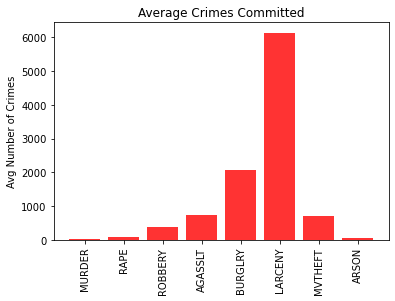

In [19]:
labels=['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']

crimes_type = merged_Crime_df[labels].mean()
x_axis = np.arange(len(crimes_type))
plt.bar(x_axis, crimes_type, color='r', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=labels,rotation = 90)

plt.title("Average Crimes Committed")
# plt.xlabel("Crimes")
plt.ylabel("Avg Number of Crimes")
plt.savefig('output_data/Average_Crimes_bar.png')
plt.show()

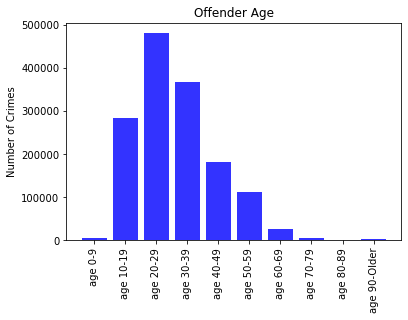

In [20]:
labels=['age 0-9', 'age 10-19', 'age 20-29','age 30-39', 'age 40-49', 
        'age 50-59', 'age 60-69', 'age 70-79','age 80-89', 'age 90-Older']
crimes_age = Age_County_df[labels].sum()
x_axis = np.arange(len(crimes_age))
plt.bar(x_axis, crimes_age, color='b', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, labels=labels,rotation = 90)

plt.title("Offender Age")
# plt.xlabel("Crimes")
plt.ylabel("Number of Crimes")
plt.savefig('output_data/Age_Crimes_bar.png')
plt.show()

In [21]:
bins = [0, 5999, 11999, 17999, 23999, 29999, 35999, 41999, 47999, 53999, 59999]

group_labels = ["0 to $6k", "$6k to $12k", "$12k to $18k", "$18k to $24k", "$24k to $30k", "$30k to $36k",
                "$42k to $48k", "$48k to $54k", "$54k to $60k", "$60k and up"]

merged_Crime_df["Income Bin"] = pd.cut(merged_Crime_df['MEDIAN INCOME'], bins, labels=group_labels)


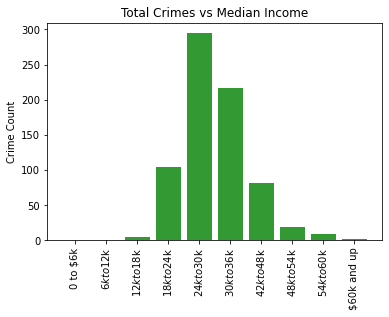

In [22]:
income_group = merged_Crime_df.groupby(["Income Bin"])
crime_group = income_group["TOTAL CRIMES"].count()

x_axis = np.arange(len(crime_group))
plt.bar(x_axis, crime_group, color='g', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
labels=["0 to $6k", "$6k to $12k", "$12k to $18k", "$18k to $24k", "$24k to $30k", "$30k to $36k",
                "$42k to $48k", "$48k to $54k", "$54k to $60k", "$60k and up"]
plt.xticks(tick_locations, labels=labels,rotation = 90)
plt.title("Total Crimes vs Median Income")
plt.ylabel("Crime Count")

plt.savefig('output_data/tot_crimes_v_age_bar.png')

plt.show()

In [23]:
df = crime_group.reset_index()
df

,Income Bin,TOTAL CRIMES
0,0 to $6k,0
1,$6k to $12k,0
2,$12k to $18k,4
3,$18k to $24k,104
4,$24k to $30k,295
5,$30k to $36k,216
6,$42k to $48k,81
7,$48k to $54k,18
8,$54k to $60k,8
9,$60k and up,1


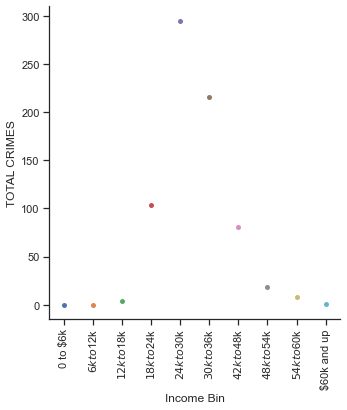

In [24]:
sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="Income Bin", y="TOTAL CRIMES", kind="swarm", data=df)
g.set_xticklabels(rotation=90)

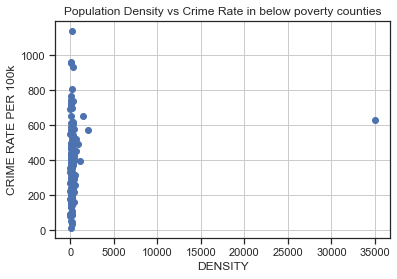

In [25]:
# Counties below poverty line = avg income
# 2017 poverty level for 4 person household was $24,600

below_poverty_df = merged_Crime_df.loc[merged_Crime_df['MEDIAN INCOME'] < 24600]
# Build a scatter plot
plt.scatter(below_poverty_df["DENSITY"], below_poverty_df["CRIME RATE PER 100k"], marker="o")
# Incorporate the other graph properties
plt.title("Population Density vs Crime Rate in below poverty counties")
plt.ylabel("CRIME RATE PER 100k")
plt.xlabel("DENSITY")
plt.grid(True)
# Save the figure
plt.savefig("output_data/density_crime_rate_below.png")
# Show plot
plt.show()

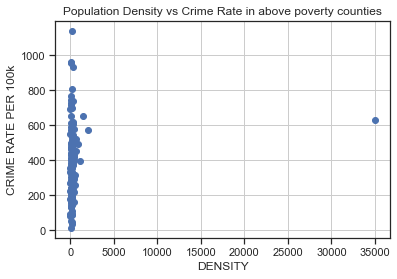

In [26]:
# Counties above poverty line = avg income
above_poverty_df = merged_Crime_df.loc[merged_Crime_df['MEDIAN INCOME'] >= 24600]
# Build a scatter plot
plt.scatter(below_poverty_df["DENSITY"], below_poverty_df["CRIME RATE PER 100k"], marker="o")
# Incorporate the other graph properties
plt.title("Population Density vs Crime Rate in above poverty counties")
plt.ylabel("CRIME RATE PER 100k")
plt.xlabel("DENSITY")
plt.grid(True)
# Save the figure
plt.savefig("output_data/density_crime_rate_above.png")
# Show plot
plt.show()

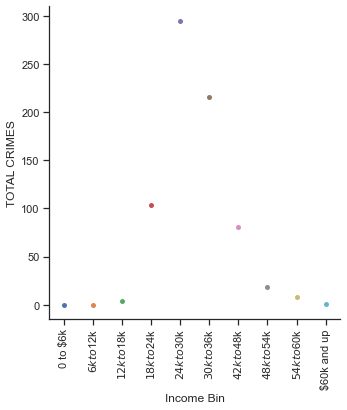

In [27]:
df = crime_group.reset_index()

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="Income Bin", y="TOTAL CRIMES", kind="swarm", data=df)
g.set_xticklabels(rotation=90)

In [28]:
Murder = merged_Crime_df["MURDER"].sum()
Rape = merged_Crime_df["RAPE"].sum()
Robbery = merged_Crime_df["ROBBERY"].sum()
Assault = merged_Crime_df["AGASSLT"].sum()
Burglary = merged_Crime_df["BURGLRY"].sum()
Larceny = merged_Crime_df["LARCENY"].sum()
Mvtheft = merged_Crime_df["MVTHEFT"].sum()
Arson = merged_Crime_df["ARSON"].sum()
total1 = merged_Crime_df["TOTAL CRIMES"].sum()
total2 = Murder + Rape + Robbery + Assault + Burglary + Larceny + Mvtheft + Arson
print(f"Total # of Murders: {Murder}")
print(f"Total # of Rapes: {Rape}")
print(f"Total # of Robbery: {Robbery}")
print(f"Total # of Assault: {Assault}")
print(f"Total # of Burglary: {Burglary}")
print(f"Total # of Larceny: {Larceny}")
print(f"Total # of Motor Vechicle Theft: {Mvtheft}")
print(f"Total # of Arson: {Arson}")
print(f"Total number of crimes: {total1}={total2}")

Total # of Murders: 10434.0
Total # of Rapes: 59431.0
Total # of Robbery: 270530.0
Total # of Assault: 543477.0
Total # of Burglary: 1513930.0
Total # of Larceny: 4466451.0
Total # of Motor Vechicle Theft: 513767.0
Total # of Arson: 38304.0
Total number of crimes: 7416324.0=7416324.0


In [104]:
#eliminate the outliers for crime and density 
quartiles = merged_Crime_df["MURDER"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [105]:
quartiles = merged_Crime_df["DENSITY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["MURDER"] > lower_bound_y) & (merged_Crime_df["MURDER"] < upper_bound_y)]

the r-value is: 0.3214014951793637
The correlation coefficient 0.32


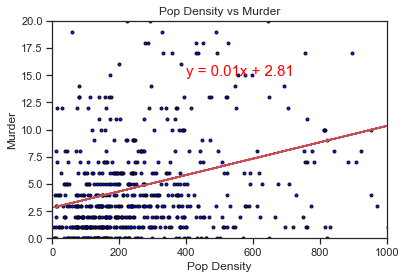

In [106]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["MURDER"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(400, 15), fontsize=15,color="red")

plt.title("Pop Density vs Murder")
plt.xlabel("Pop Density")
plt.ylabel("Murder")

plt.xlim(0, 1000)
plt.ylim(0, 20)
plt.savefig('output_data/dens_v_murder_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')
plt.show()

In [107]:
quartiles = merged_Crime_df["RAPE"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [108]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["RAPE"] > lower_bound_y) & (merged_Crime_df["RAPE"] < upper_bound_y)]

the r-value is: 0.2985481465889129
The correlation coefficient 0.3


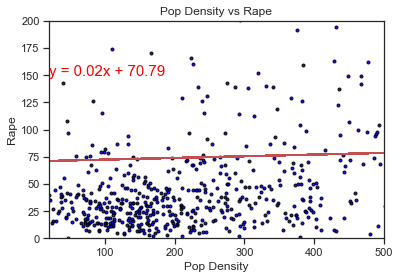

In [109]:
x_values = merged_Crime_df["DENSITY"]
y_values = merged_Crime_df["RAPE"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20, 150), fontsize=15,color="red")

plt.title("Pop Density vs Rape")
plt.xlabel("Pop Density")
plt.ylabel("Rape")

plt.xlim(20, 500)
plt.ylim(0, 200)

plt.savefig('output_data/dens_v_rape_scat.png')


print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [110]:
quartiles = merged_Crime_df["ROBBERY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [111]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["ROBBERY"] > lower_bound_y) & (merged_Crime_df["ROBBERY"] < upper_bound_y)]

the r-value is: 0.4517784654306762
The correlation coefficient 0.45


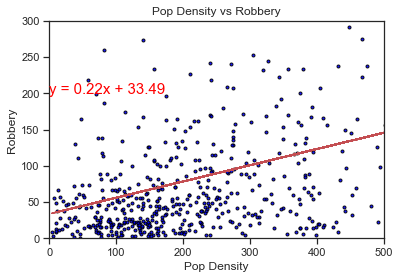

In [112]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["ROBBERY"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 200), fontsize=15,color="red")

plt.title("Pop Density vs Robbery")
plt.xlabel("Pop Density")
plt.ylabel("Robbery")

plt.xlim(0, 500)
plt.ylim(0, 300)
plt.savefig('output_data/dens_v_rob_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [113]:
quartiles = merged_Crime_df["AGASSLT"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [114]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["AGASSLT"] > lower_bound_y) & (merged_Crime_df["AGASSLT"] < upper_bound_y)]

the r-value is: 0.45311498361564956
The correlation coefficient 0.45


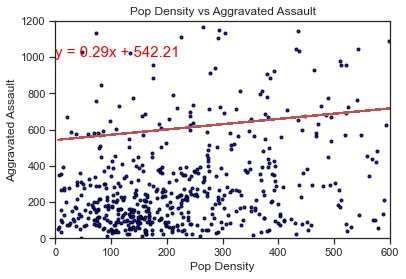

In [115]:
x_values = merged_Crime_df["DENSITY"]
y_values = merged_Crime_df["AGASSLT"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 1000), fontsize=15,color="red")

plt.title("Pop Density vs Aggravated Assault")
plt.xlabel("Pop Density")
plt.ylabel("Aggravated Assault")

plt.xlim(0, 600)
plt.ylim(0, 1200)

plt.savefig('output_data/dens_v_aslt_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

the r-value is: 0.4241307213019231
The correlation coefficient 0.42


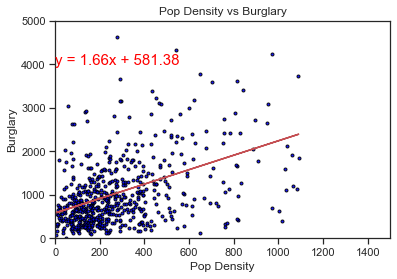

In [116]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["BURGLRY"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 4000), fontsize=15,color="red")

plt.title("Pop Density vs Burglary")
plt.xlabel("Pop Density")
plt.ylabel("Burglary")

plt.xlim(0, 1500)
plt.ylim(0, 5000)

plt.savefig('output_data/dens_v_burg_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [117]:
quartiles = merged_Crime_df["LARCENY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [118]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["LARCENY"] > lower_bound_y) & (merged_Crime_df["LARCENY"] < upper_bound_y)]

the r-value is: 0.5459361914772196
The correlation coefficient 0.55


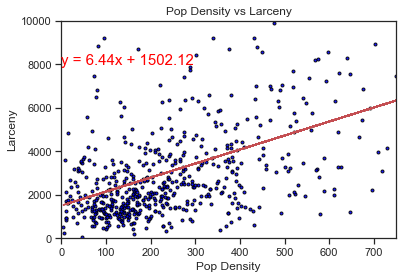

In [119]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["LARCENY"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 8000), fontsize=15,color="red")

plt.title("Pop Density vs Larceny")
plt.xlabel("Pop Density")
plt.ylabel("Larceny")

plt.xlim(0, 750)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_larc_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [120]:
quartiles = merged_Crime_df["MVTHEFT"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [121]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["MVTHEFT"] > lower_bound_y) & (merged_Crime_df["MVTHEFT"] < upper_bound_y)]

the r-value is: 0.4054271682690482
The correlation coefficient 0.41


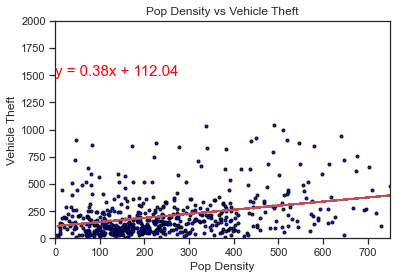

In [122]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["MVTHEFT"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 1500), fontsize=15,color="red")

plt.title("Pop Density vs Vehicle Theft")
plt.xlabel("Pop Density")
plt.ylabel("Vehicle Theft")

plt.xlim(0, 750)
plt.ylim(0, 2000)
plt.savefig('output_data/dens_v_vtheft_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [123]:
quartiles = merged_Crime_df["ARSON"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [124]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["ARSON"] > lower_bound_y) & (merged_Crime_df["ARSON"] < upper_bound_y)]

the r-value is: 0.3794377097036437
The correlation coefficient 0.38


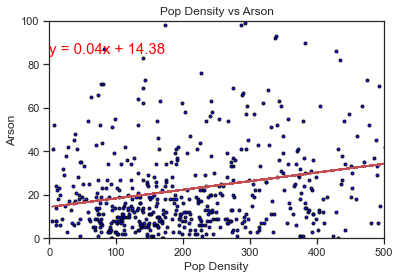

In [125]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["ARSON"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0, 85), fontsize=15,color="red")

plt.title("Pop Density vs Arson")
plt.xlabel("Pop Density")
plt.ylabel("Arson")

plt.xlim(0, 500)
plt.ylim(0, 100)
plt.savefig('output_data/dens_v_ars_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

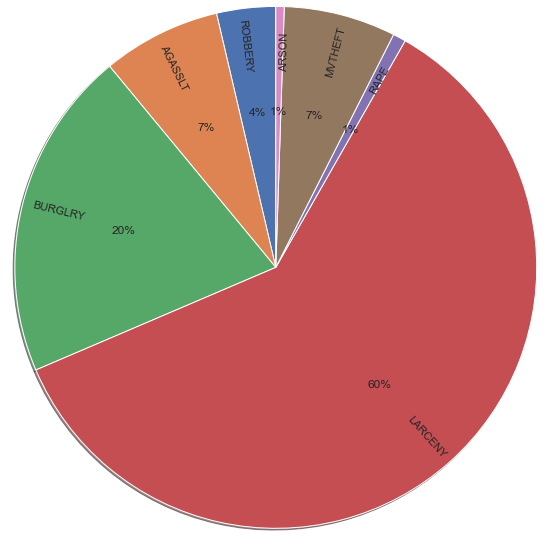

In [126]:
crimes_sum = merged_Crime_df[['ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY','RAPE', 'MVTHEFT', 'ARSON']].sum()
names = ['ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY','RAPE', 'MVTHEFT', 'ARSON']
explode = (0.0,0.0,0.0,0.0, 0.0, 0.0, 0.0)
plt.pie(crimes_sum, explode=explode, labels=names, radius=3,
        autopct="%1.0f%%", shadow=True, startangle=90,rotatelabels=90, pctdistance=0.6, labeldistance=.75)
# plt.axis("equal")
# plt.title("Crimes Committed")
plt.show()
# explode = (0.5,0.5,0.5,0.0, 0.5, 0.5, 0.5)

In [127]:
quartiles = merged_Crime_df["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [128]:
no_outlier_dens = merged_Crime_df.loc[(merged_Crime_df["DENSITY"] > lower_bound) & (merged_Crime_df["DENSITY"] < upper_bound) & (merged_Crime_df["TOTAL CRIMES"] > lower_bound_y) & (merged_Crime_df["TOTAL CRIMES"] < upper_bound_y)]

the r-value is: 0.5382246728500469
The correlation coefficient 0.54


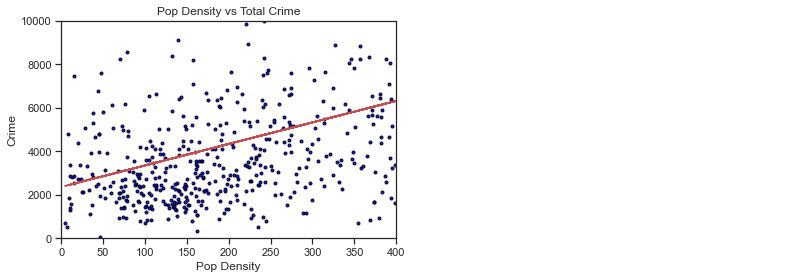

In [129]:
x_values = no_outlier_dens["DENSITY"]
y_values = no_outlier_dens["TOTAL CRIMES"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(700, 1000), fontsize=15,color="red")

plt.title("Pop Density vs Total Crime")
plt.xlabel("Pop Density")
plt.ylabel("Crime")

plt.xlim(0, 400)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_tot_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [130]:
# 2017 poverty level for 4 person household was $24,600
below_pov = no_outlier_dens.loc[no_outlier_dens["MEDIAN INCOME"] < 24600]
above_pov = no_outlier_dens.loc[no_outlier_dens["MEDIAN INCOME"] >= 24600]

In [131]:
quartiles = below_pov["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [132]:
quartiles = below_pov["DENSITY"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


no_outlier_dens = below_pov.loc[(below_pov["DENSITY"] > lower_bound) & (below_pov["DENSITY"] < upper_bound) & (below_pov["TOTAL CRIMES"] > lower_bound_y) & (below_pov["TOTAL CRIMES"] < upper_bound_y)]

the r-value is: 0.42814368005728054
The correlation coefficient 0.43


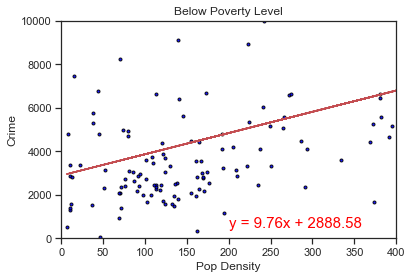

In [133]:
x_values = below_pov["DENSITY"]
y_values = below_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(200, 500), fontsize=15,color="red")

plt.title("Below Poverty Level")
plt.xlabel("Pop Density")
plt.ylabel("Crime")

plt.xlim(0, 400)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_tot_bpov_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [134]:
quartiles = above_pov["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_y = lowerq - (1.5*iqr)
upper_bound_y = upperq + (1.5*iqr)

In [135]:
no_outlier_dens = above_pov.loc[(above_pov["DENSITY"] > lower_bound) & (above_pov["DENSITY"] < upper_bound) & (above_pov["MURDER"] > lower_bound_y) & (above_pov["MURDER"] < upper_bound_y)]

the r-value is: 0.5560637596330874
The correlation coefficient 0.56


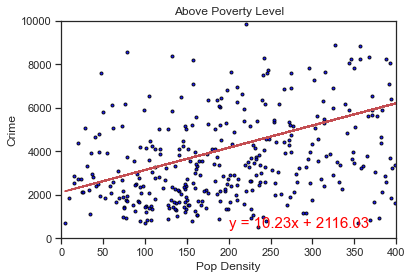

In [136]:
x_values = above_pov["DENSITY"]
y_values = above_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker=".", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(200, 500), fontsize=15,color="red")

plt.title("Above Poverty Level")
plt.xlabel("Pop Density")
plt.ylabel("Crime")

plt.xlim(0, 400)
plt.ylim(0, 10000)
plt.savefig('output_data/dens_v_tot_apov_scat.png')

print(f'The correlation coefficient {round(st.pearsonr(x_values,y_values)[0],2)}')

In [137]:
#number of crimes committed above poverty level
ap = above_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)
crimes_ap = ap.sum()

#number of crimes committed below poverty level
bp = below_pov[['MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']].sum(axis=1)
crimes_bp = bp.sum()

pop_above = above_pov["POPULATION"].sum()

pop_below = below_pov["POPULATION"].sum()

perc_ab = (crimes_ap/pop_above)*100

perc_bel = (crimes_bp/pop_below)*100

print(f'{round(perc_bel,2)}% of the population in counties with median income below poverty level (4 person household) committed crimes')
print(f'{round(perc_ab,2)}% of the population in counties with median income above poverty level (4 person household) committed crimes')
print(f'That is a {round((((perc_bel/perc_ab) - 1) *100),2)}% increase in crime in counties that are below the poverty level')

3.82% of the population in counties with median income below poverty level (4 person household) committed crimes
2.86% of the population in counties with median income above poverty level (4 person household) committed crimes
That is a 33.8% increase in crime in counties that are below the poverty level


In [65]:
dens_bins = [0, 29, 59, 89, 119, 149, 179, 209, 239, 269, 299, 329, 359, 389]

dens_labels = ["0 to 30", "30 to 60", "60 to 90", "90 to 120", "120 to 150", "180 to 210",
                "210 to 240", "240 to 270", "270 to 300", "300 to 330", "330 to 360", "360 to 390", "390 and up"]

merged_Crime_df['DENSITY BIN'] = pd.cut(merged_Crime_df['DENSITY'], dens_bins, labels=dens_labels)

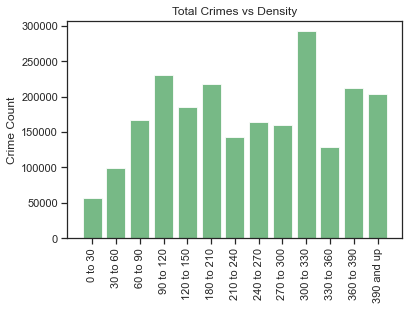

In [66]:
dens_group = merged_Crime_df.groupby(["DENSITY BIN"])
dens_crime_group = dens_group["TOTAL CRIMES"].sum()

x_axis = np.arange(len(dens_crime_group))
plt.bar(x_axis, dens_crime_group, color='g', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0 to 30", "30 to 60", "60 to 90", "90 to 120", "120 to 150", "180 to 210",
                "210 to 240", "240 to 270", "270 to 300", "300 to 330", "330 to 360", "360 to 390", "390 and up"],rotation = 90)

plt.title("Total Crimes vs Density")
# plt.xlabel("Crimes")
plt.ylabel("Crime Count")

plt.show()


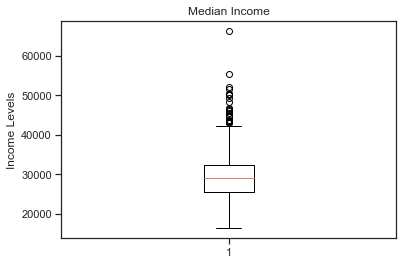

In [67]:
crime_total = merged_Crime_df["MEDIAN INCOME"]
fig1, ax1 = plt.subplots()
ax1.set_title('Median Income')
ax1.set_ylabel('Income Levels')
ax1.boxplot(crime_total)
plt.show()

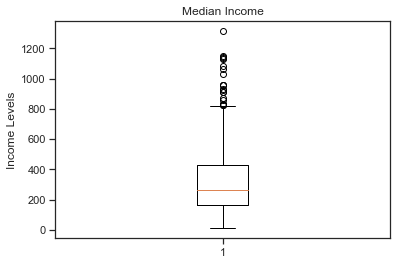

In [68]:
crime_total = merged_Crime_df["CRIME RATE PER 100k"]
fig1, ax1 = plt.subplots()
ax1.set_title('Median Income')
ax1.set_ylabel('Income Levels')
ax1.boxplot(crime_total)
plt.show()

In [69]:
quartiles = merged_Crime_df["TOTAL CRIMES"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Total Crime is: {lowerq}")
print(f"The upper quartile of Total Crime is: {upperq}")
print(f"The interquartile range of Total Crime is: {iqr}")
print(f"The the median of Total Crime is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Total Crime is: 2520.75
The upper quartile of Total Crime is: 9909.25
The interquartile range of Total Crime is: 7388.5
The the median of Total Crime is: 4519.0 
Values below -8562.0 could be outliers.
Values above 20992.0 could be outliers.


In [138]:
upperq_tot_crime = merged_Crime_df.loc[merged_Crime_df["TOTAL CRIMES"] > upperq]
print(f'The average population density of counties that fall above the 75% quartile in crime is {round(upperq_tot_crime["DENSITY"].mean(),2)} people per square mile')
print(f'The national average population density is {round(merged_Crime_df["DENSITY"].mean(),2)} people per square mile')

The average population density of counties that fall above the 75% quartile in crime is 1563.95 people per square mile
The national average population density is 702.41 people per square mile


In [72]:
largest_dens = merged_Crime_df.nlargest(5, 'DENSITY')

print(f'The average amount of crimes committed in the top 5 most densily populated counties in the U.S. was {round(largest_dens["TOTAL CRIMES"].mean(),2)}, the national average was {round(merged_Crime_df["TOTAL CRIMES"].mean(),2)}')
largest_dens[["STATE","COUNTY"]]

The average amount of crimes committed in the top 5 most densily populated counties in the U.S. was 38228.8, the national average was 10187.26


,STATE,COUNTY
385,New York,Kings
375,New York,Bronx
397,New York,Queens
354,New Jersey,Hudson
270,Massachusetts,Suffolk


In [73]:
quartiles = merged_Crime_df["MEDIAN INCOME"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Median Income is: {lowerq}")
print(f"The upper quartile of Median Income is: {upperq}")
print(f"The interquartile range of Median Income is: {iqr}")
print(f"The the median of Median Income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Median Income is: 25582.5
The upper quartile of Median Income is: 32261.25
The interquartile range of Median Income is: 6678.75
The the median of Median Income is: 28925.5 
Values below 15564.375 could be outliers.
Values above 42279.375 could be outliers.


In [74]:
upperq_income = merged_Crime_df.loc[merged_Crime_df["MEDIAN INCOME"] > upperq]
print(f'The average total crimes in counties that fall above the 75% quartile in median income is {round(upperq_income["TOTAL CRIMES"].mean(),2)}')
print(f'The national average total crimes is {round(merged_Crime_df["TOTAL CRIMES"].mean(),2)} per county')

The average total crimes in counties that fall above the 75% quartile in median income is 10436.61
The national average total crimes is 10187.26 per county


In [141]:
richest = merged_Crime_df.nlargest(5, 'MEDIAN INCOME')

print(f'The average amount of crimes committed in the top 5 richest counties in the U.S. was {round(richest["TOTAL CRIMES"].mean(),2)}, the national average was {round(merged_Crime_df["TOTAL CRIMES"].mean(),2)}')
richest[["COUNTY","STATE","MEDIAN INCOME"]]

The average amount of crimes committed in the top 5 richest counties in the U.S. was 7194.8, the national average was 10187.26


,COUNTY,STATE,MEDIAN INCOME
665,Arlington,Virginia,66404
674,Loudoun,Virginia,55444
256,Howard,Maryland,52040
669,Fairfax,Virginia,51544
74,Douglas,Colorado,50367
